In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [78]:
df = pd.read_csv(r'C:\Users\Оксана\Downloads\survey_lung_cancer.csv')
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [79]:
print(f'The number of doubles {df[df.duplicated()].shape[0]} In our set {df.shape[0]}')
df.drop_duplicates(keep='first',inplace=True) # оставяем первый вариант
print(f'After deleted we have - {df.shape[0]} data/lines')

The number of doubles 33 In our set 309
After deleted we have - 276 data/lines


In [57]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [58]:
df_temp = df.copy() # скопируем базу для диаграм 
df_temp["GENDER"] = df_temp["GENDER"].replace({"M" : "Male" , "F" : "Female"})

for col in df_temp.columns:
    df_temp[col] = df_temp[col].replace({2: "Yes" , 1 : "No"})

df_temp.head(25)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO
5,Female,75,No,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,YES
6,Male,52,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,YES
7,Female,51,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,YES
8,Female,68,Yes,No,Yes,No,No,Yes,No,No,No,No,No,No,No,NO
9,Male,53,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Yes,Yes,YES


In [59]:
marker = df_temp[df_temp['LUNG_CANCER'] == 'YES']

In [60]:
# посчитаем соотношение полов
count_f = 0
for el in df_temp['GENDER']:
    if el == 'Female':
        count_f +=1 
part_f = count_f/df.shape[0]        
print(f'Female - {round((part_f*100),2)}')    

count_m = 0
for el in df_temp['GENDER']:
    if el == 'Male':
        count_m +=1 
        
part_m = (count_m/df.shape[0])    

print(f'Male - {round((part_m*100),2)}')  
# надо найти коэфицент для женщин и мужчин предположим что 0.5 и 0.5 должно было бы быть
k_male =  (1-part_m) / 0.5 # мужчин больше поэтому для них коэфицент ниже
k_female = (1- part_f) / 0.5 # женщин в наборе меньше поэтому для них коэфицент больше
print(f'коэфицент домножения данных для мужчин - {k_male}, для женщин - {k_female}')

Female - 48.55
Male - 51.45
коэфицент домножения данных для мужчин - 0.9710144927536233, для женщин - 1.028985507246377


In [61]:
#Более верная стратафикация  - число мужского населения составляет 50,4%, в то время как женщин - 49,6% по данным 2019 года
# так как количесво м и ж стало ближе к данным сета то и коэфиценты будут ближе к 1
k_male_true =  (1-part_m) / 0.496 
k_female_true =  (1-part_f) / 0.504
print(f'коэфицент домножения данных для мужчин - {k_male_true}, для женщин - {k_female_true}')

коэфицент домножения данных для мужчин - 0.9788452547919589, для женщин - 1.0208189556015643


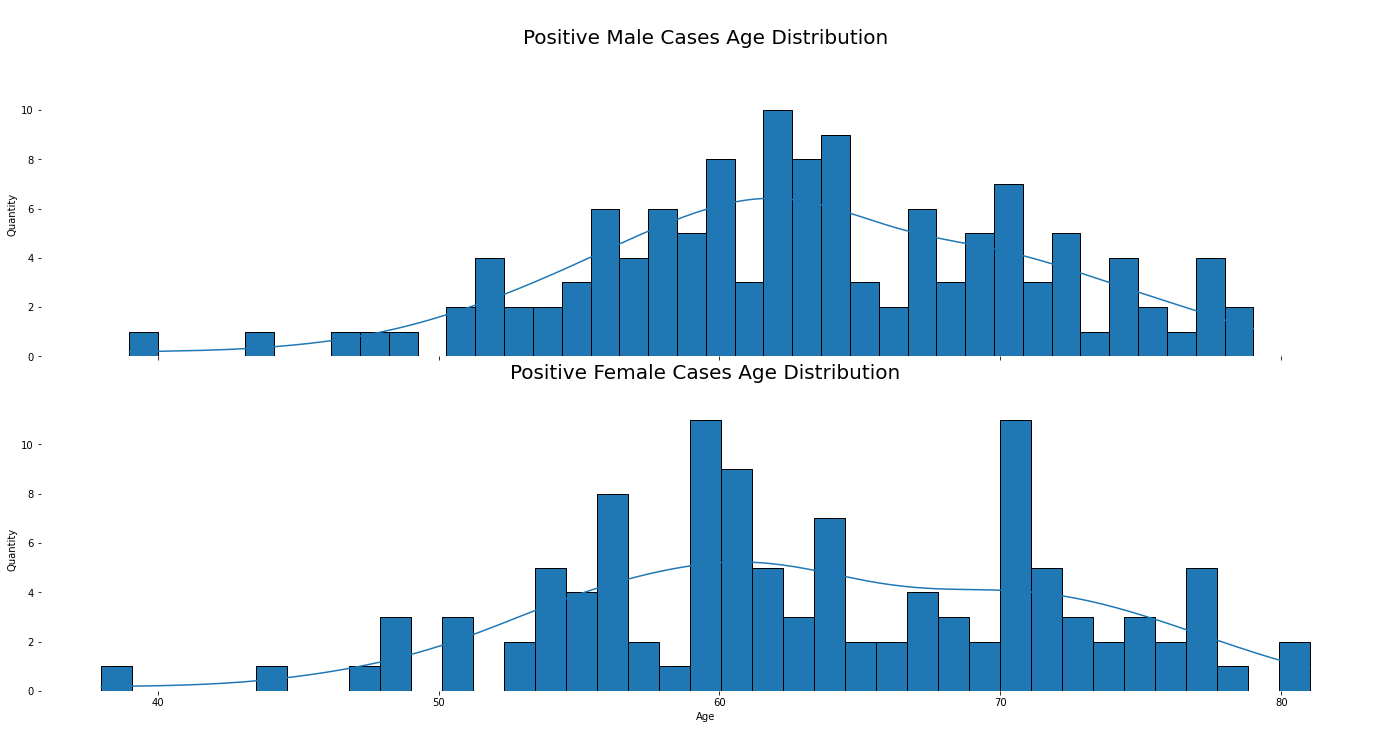

In [62]:

_, axs = plt.subplots(2,1,figsize=(20,10),sharex=True,sharey=True)
plt.tight_layout(pad=4.0)

sns.histplot(marker[marker["GENDER"]=="Male"]["AGE"],  kde=True, ax=axs[0], bins=39, alpha=1, fill=True)
axs[0].set_title("\nPositive Male Cases Age Distribution\n",fontsize=20)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Quantity")

sns.histplot(marker[marker["GENDER"]=="Female"]["AGE"],kde=True, ax=axs[1], bins=39, alpha=1, fill=True)

axs[1].set_title("\nPositive Female Cases Age Distribution\n",fontsize=20)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Quantity")

sns.despine(left=True, bottom=True)
plt.show()




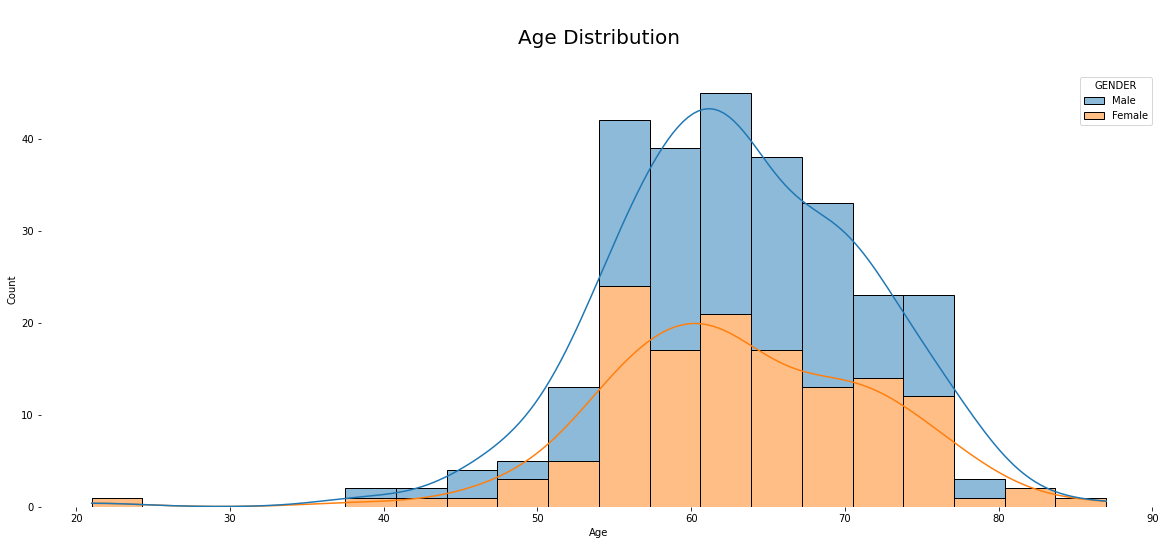

In [63]:
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=df_temp, x="AGE", hue="GENDER", multiple="stack", kde=True, fill=True) 
# kde добавляет линию к гистограме
# multiple="stack" - не закрашивает персечение баров
p.axes.set_title("\nAge Distribution\n",fontsize=20)
plt.ylabel("Count")
plt.xlabel("Age")

sns.despine(left=True, bottom=True)
plt.show()

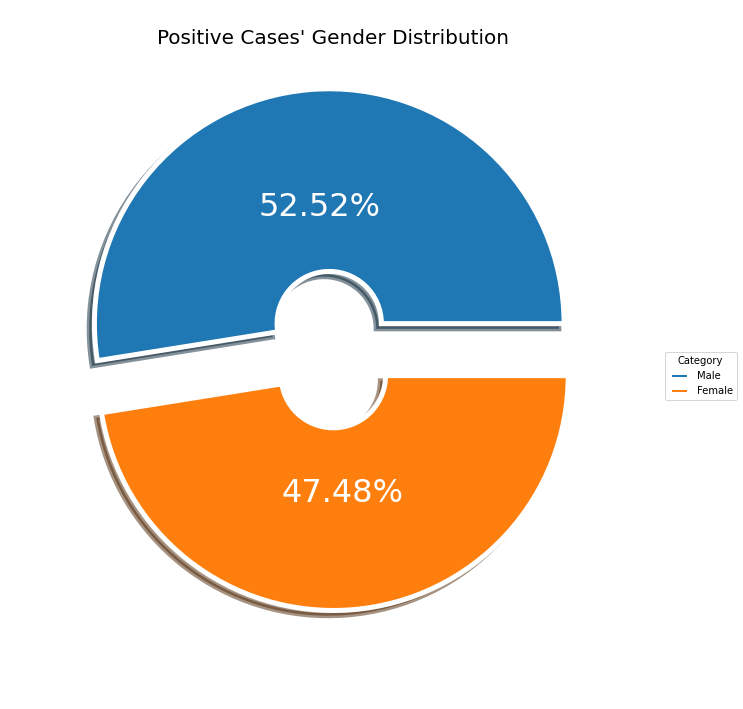

In [64]:
plt.subplots(figsize=(12, 12))

labels = "Male","Female"
size = 0.7

wedges, texts, autotexts = plt.pie([len(marker[marker["GENDER"]=="Male"]["GENDER"]),
                                    len(marker[marker["GENDER"]=="Female"]["GENDER"])],
                                    explode = (0.2,0),
                                    textprops=dict(size= 32, color= "white"), # размер и цвет текста внутри диаграмы
                                    autopct="%.2f%%",
                                    pctdistance = 0.5, # положение текста значение процентов
                                    radius=0.9, 
                                    shadow = True, # добовляет эфект тени к диаграме
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5), # круг добовляет в центре
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nPositive Cases' Gender Distribution",fontsize=20)
plt.show()

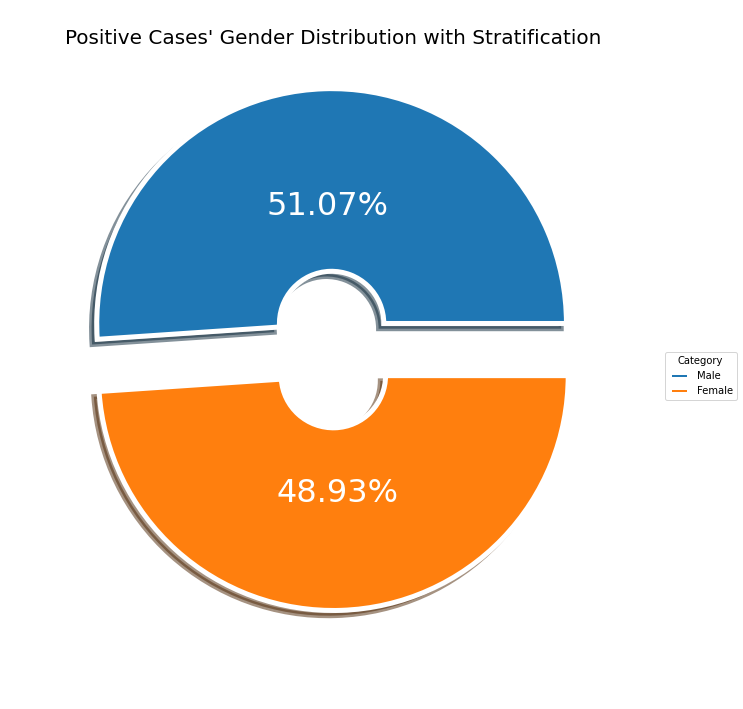

In [65]:
plt.subplots(figsize=(12, 12))

labels = "Male","Female"
size = 0.7

wedges, texts, autotexts = plt.pie([len(marker[marker["GENDER"]=="Male"]["GENDER"])*k_male,
                                    len(marker[marker["GENDER"]=="Female"]["GENDER"])*k_female],
                                    explode = (0.2,0),
                                    textprops=dict(size= 32, color= "white"), # размер и цвет текста внутри диаграмы
                                    autopct="%.2f%%",
                                    pctdistance = 0.5, # положение текста значение процентов
                                    radius=0.9, 
                                    shadow = True, # добовляет эфект тени к диаграме
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5), # круг добовляет в центре
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nPositive Cases' Gender Distribution with Stratification",fontsize=20)
plt.show()

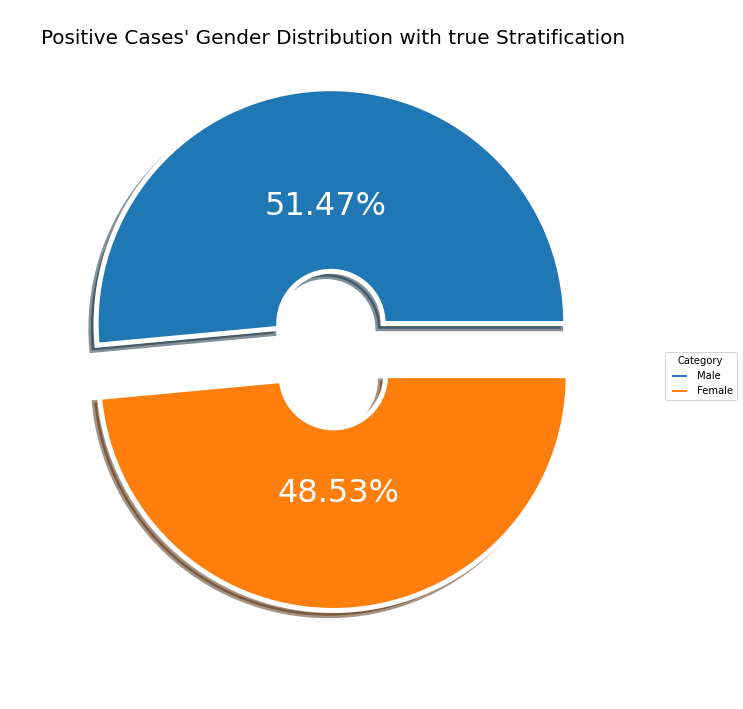

In [66]:
plt.subplots(figsize=(12, 12))

labels = "Male","Female"
size = 0.7

wedges, texts, autotexts = plt.pie([len(marker[marker["GENDER"]=="Male"]["GENDER"])*k_male_true,
                                    len(marker[marker["GENDER"]=="Female"]["GENDER"])*k_female_true],
                                    explode = (0.2,0),
                                    textprops=dict(size= 32, color= "white"), # размер и цвет текста внутри диаграмы
                                    autopct="%.2f%%",
                                    pctdistance = 0.5, # положение текста значение процентов
                                    radius=0.9, 
                                    shadow = True, # добовляет эфект тени к диаграме
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5), # круг добовляет в центре
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nPositive Cases' Gender Distribution with true Stratification",fontsize=20)
plt.show()

In [67]:
df['GENDER'] = df['GENDER'].replace({'M': 'Male', 'F': 'Female'})
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES': 2, 'NO': 1})
df = pd.get_dummies(df, columns=['GENDER'])
df.rename(columns={'Gender_M':'Male', 'Gender_G':'Female'}, inplace=True)
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_Female,GENDER_Male
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1,1,0


In [68]:
df.corr()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_Female,GENDER_Male
AGE,1.000000,-0.073410,0.025773,0.050605,0.037848,-0.003431,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806,0.106305,0.013120,-0.013120
SMOKING,-0.073410,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984,0.034878,-0.041131,0.041131
YELLOW_FINGERS,0.025773,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169,0.189192,0.202506,-0.202506
ANXIETY,0.050605,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182,0.144322,0.152032,-0.152032
PEER_PRESSURE,0.037848,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655,0.195086,0.261427,-0.261427
CHRONIC DISEASE,-0.003431,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895,0.143692,0.189925,-0.189925
FATIGUE,0.021606,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757,0.160078,0.079020,-0.079020
ALLERGY,0.037139,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440,0.333552,-0.150174,0.150174
WHEEZING,0.052803,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846,0.249054,-0.121047,0.121047
ALCOHOL CONSUMING,0.052049,-0.052771,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.163370,-0.000635,0.310767,0.294422,-0.434264,0.434264


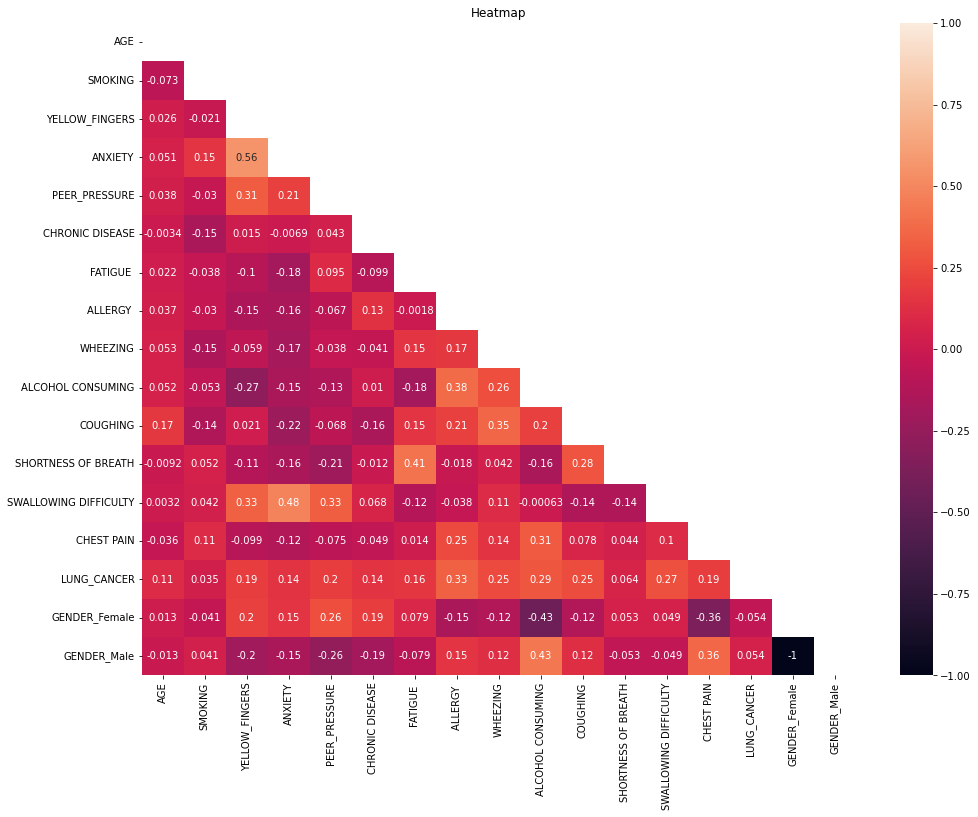

In [69]:
plt.figure(figsize=(16, 12))
mask = np.triu(df.corr())
sns.heatmap(df.corr(), center=0, annot=True, mask = mask, vmax=1, vmin=-1, cmap='rocket')

plt.title('Heatmap');

In [70]:
y = df['LUNG_CANCER']
x = df.drop(['LUNG_CANCER'], axis=1)

In [71]:
sc = StandardScaler()

x= sc.fit_transform(x)

In [72]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42);

In [73]:
lr = LogisticRegression() # LogisticRegression
lr.fit(xtrain, ytrain)
lr_p = lr.predict(xtest)
lr_report = classification_report(ytest, lr_p)
lr_a = round(accuracy_score(ytest, lr_p)*100, ndigits=2)
print(f'Accuracity of Logistic regrassion - {lr_a}\nClassification report - \n {lr_report}')


Accuracity of Logistic regrassion - 92.86
Classification report - 
               precision    recall  f1-score   support

           1       1.00      0.67      0.80        12
           2       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56



In [77]:
svmet = svm.SVC()
svmet.fit(xtrain, ytrain)
svmet_p = svmet.predict(xtest)
svmet_report = classification_report(ytest, lr_p)
svmet_a = round(accuracy_score(ytest, svmet_p)*100, ndigits=2)
print(f'Accuracity of SVM - {svmet_a}\nClassification report - \n {svmet_report}')


Accuracity of SVM - 82.14
Classification report - 
               precision    recall  f1-score   support

           1       1.00      0.67      0.80        12
           2       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56



In [75]:
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)
gnb_p = gnb.predict(xtest)
gnb_report = classification_report(ytest, gnb_p)
gnb_a = round(accuracy_score(ytest, gnb_p)*100, ndigits=2)
print(f'Accuracity of GaussianNB - {gnb_a}\nClassification report - \n {gnb_report}')

Accuracity of GaussianNB - 91.07
Classification report - 
               precision    recall  f1-score   support

           1       0.89      0.67      0.76        12
           2       0.91      0.98      0.95        44

    accuracy                           0.91        56
   macro avg       0.90      0.82      0.85        56
weighted avg       0.91      0.91      0.91        56



In [76]:
kn = KNeighborsClassifier()
kn.fit(xtrain, ytrain)
kn_p = kn.predict(xtest)
kn_report = classification_report(ytest, kn_p)
kn_a = round(accuracy_score(ytest, kn_p)*100, ndigits=2)
print(f'Accuracity of KNeighborsClassifier - {kn_a}\nClassification report - \n {kn_report}')

Accuracity of KNeighborsClassifier - 82.14
Classification report - 
               precision    recall  f1-score   support

           1       0.75      0.25      0.38        12
           2       0.83      0.98      0.90        44

    accuracy                           0.82        56
   macro avg       0.79      0.61      0.64        56
weighted avg       0.81      0.82      0.78        56



Conclusions - 

1) Greater accuracy and precision was obtained using logistic regression. In oure case more importan precision than recall.

2) From the heat map we seen that the presence of cancer is most correlated with allergy, alcohol consumption,   swallowing dificulty, wheezin., It may be worth try to unite some feature and see how it correlate.
